# Lab assignment: Clustering

* **Author**: Professor Nakul

**Instructions** 

* Read and work through all tutorial content and do all exercises below
  
**Submission:**

* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

# Data Import and Cleaning and Exploration.

This fairly new dataset on Palmer Island Penguins was collected and made available by [Dr. Kristen Gorman](https://pallter.marine.rutgers.edu/) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/). 

The datasets contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica. We will perform clustering procedure on this dataset.


# Import libraries and load the dataset

Make sure to drop the rowid column

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# import penguins dataset and drop rowid column
df = pd.read_csv("penguins.csv")
df.drop("rowid", axis=1, inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# Perform Exploteratory Data Analysis

Following steps are required for any data analysis project:

## Check the number of rows and columns in the dataset

In [3]:
# get the number of rows and columns
df.shape

(344, 8)

## Get the data types of the columns

In [4]:
# get column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


## Check for missing values

In [5]:
# check for missing values
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## Check unique values for categorical columns. For a unusual data value make sure to replace it with the most frequent value (for categorical columns), and with the mean value (for numerical columns)

There are a lot of missing values in `sex` column, make a conscious decision on how to handle them. Write two+ lines on what procedure and logic you used to make that decision. For example, you can write, "I chose to replace values for Adelie penguins on Torgersen island to be all male (or x% male and (1-x)% female)... I chose this procedure because number of penguins male penguins were underrepresented (a usual ratio is for mammels is around 55% female and 45% males)"replace the missing values with the most frequent value in the column.

In [6]:
# get y labels
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

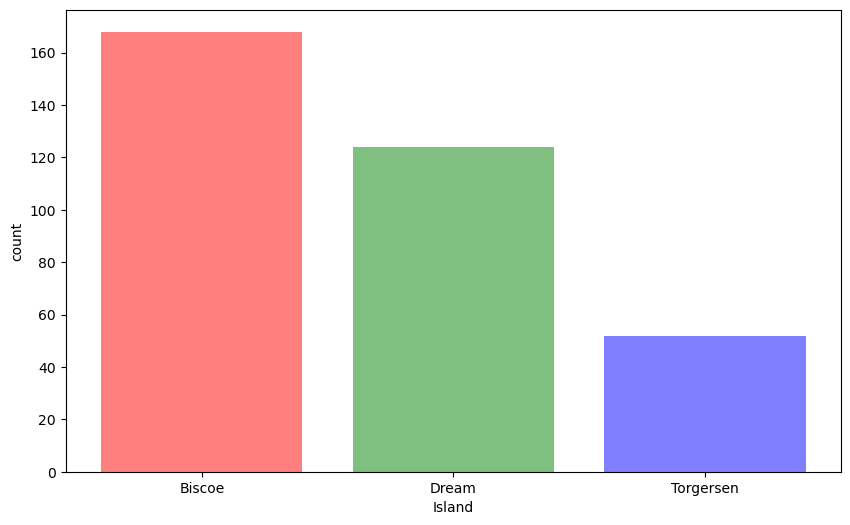

In [7]:
# plot number of penguins on each island
island_counts = df['island'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(island_counts.index, island_counts.values,color=['r','g','b','y'],alpha=0.5)
# plt.title('Number of Penguins on Each Island')
plt.xlabel('Island')
plt.ylabel('count')
plt.show()

In [8]:
# get sex labels
df["sex"].unique()

array(['male', 'female', nan], dtype=object)

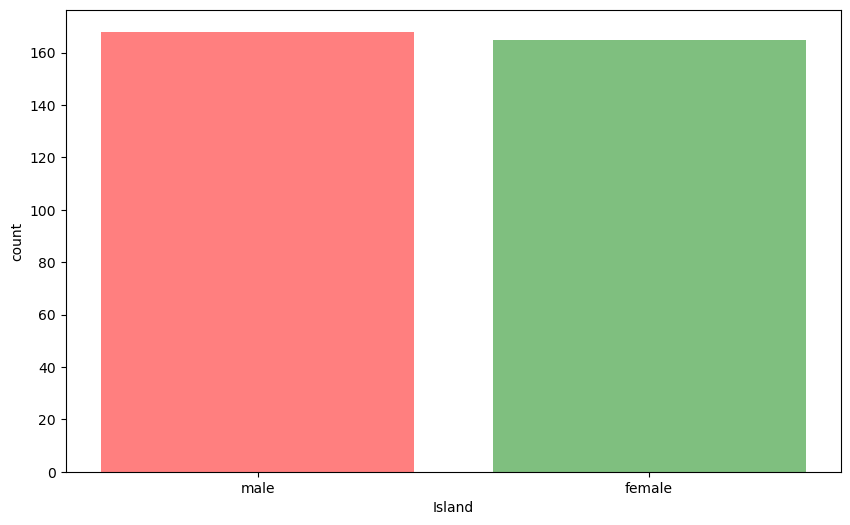

In [9]:
# plot number of penguins by sex
sex_counts = df['sex'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(sex_counts.index, sex_counts.values,color=['r','g','b','y'],alpha=0.5)
# plt.title('Number of Penguins on Each Island')
plt.xlabel('Island')
plt.ylabel('count')
plt.show()

In [10]:
# get species labels
df["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


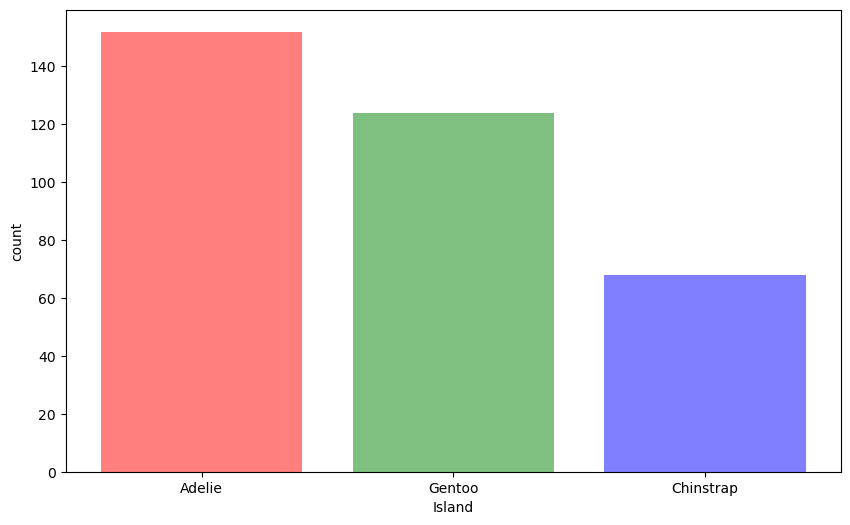

In [11]:
# plot number of penguins by species
species_counts = df['species'].value_counts()
print(species_counts)
plt.figure(figsize=(10,6))
plt.bar(species_counts.index, species_counts.values,color=['r','g','b','y'],alpha=0.5)
# plt.title('Number of Penguins on Each Island')
plt.xlabel('Island')
plt.ylabel('count')
plt.show()

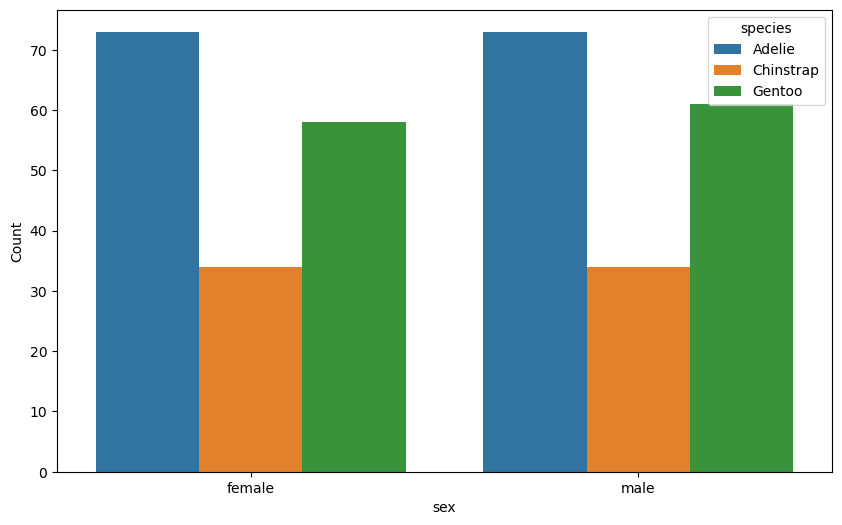

In [12]:
# get number of penguins by species and sex
counts = df.groupby(['species', 'sex']).size().reset_index(name='count')
counts['count']
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='sex', y='count', hue='species')
plt.xlabel('sex')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

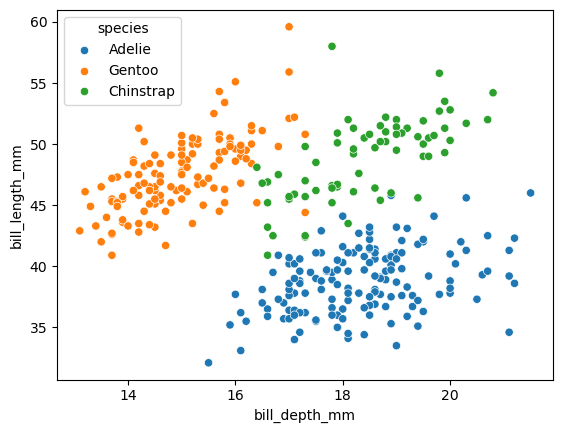

In [13]:
# plot  bill length vs bill depth and color by species
sns.scatterplot(data=df, x=df['bill_depth_mm'], y=df['bill_length_mm'], hue=df['species'])

In [14]:
# check for Nan values for sex
df[df['sex'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [15]:
# check for Nan values for bill_length_mm
df[df['bill_length_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [16]:
# check for Nan values for bill_depth_mm
df[df['bill_depth_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [17]:
# check for Nan values for flipper_length_mm
df[df['flipper_length_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [18]:
# check for Nan values for body_mass_g
df[df['body_mass_g'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [19]:
# Replace continuous missing values with mean of the column. check for Nan values again.
for column in df.select_dtypes(include=['float64']):
    df[column] = df[column].fillna(df[column].mean())
df.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64

In [20]:
# Replace categorical missing values with mode of the column. check for Nan values again.
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0])
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [21]:
# Replace categorical values with category codes by using the cat.codes function. you can either replace them in place or create a new column. show the altered dataframe again by using head() 
for column in df.select_dtypes(include=['object', 'category']):
    df[column] = df[column].astype('category').cat.codes
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.10000,18.70000,181.000000,3750.000000,1,2007
1,0,2,39.50000,17.40000,186.000000,3800.000000,0,2007
2,0,2,40.30000,18.00000,195.000000,3250.000000,0,2007
3,0,2,43.92193,17.15117,200.915205,4201.754386,1,2007
4,0,2,36.70000,19.30000,193.000000,3450.000000,0,2007


# Seperate the dataset into features and labels

In [22]:
# Split the dataset in X and y. since this is unsupervised learning, we will not use the y labels. you can choose to normalize the X data by using the StandardScaler function.
from sklearn.preprocessing import StandardScaler

X = df.drop('species', axis=1)  # Drop the 'species' column to form the feature matrix
y = df['species']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform K-means

In [23]:
# import relevent libraries for clustering. we will use KMeans, AgglomerativeClustering, MeanShift, Birch, and DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN

In [24]:
# for k means clustering we will use the elbow method to find the optimal number of clusters. we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. make sure to save it in a dataframe and plot it using matplotlib.

# Apply KMeans and find inertia for each number of clusters
inertia_values = []
distortions = []

clusters_range = range(1, 11)
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
    kmeans.fit(X_normalized)
    inertia_values.append(kmeans.inertia_)
    distortions.append(kmeans.inertia_ / X.shape[0]) 

df_inertia_distortion = pd.DataFrame({'Number of Clusters': clusters_range, 'Inertia': inertia_values, 'Distortion': distortions})


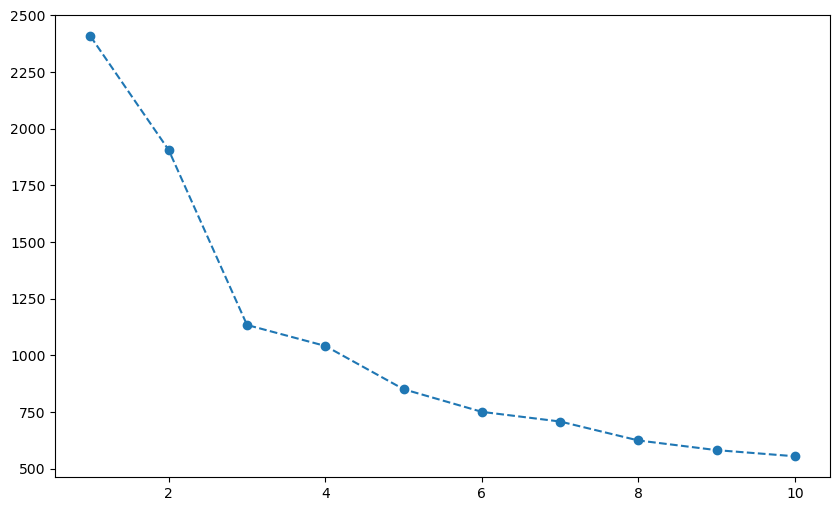

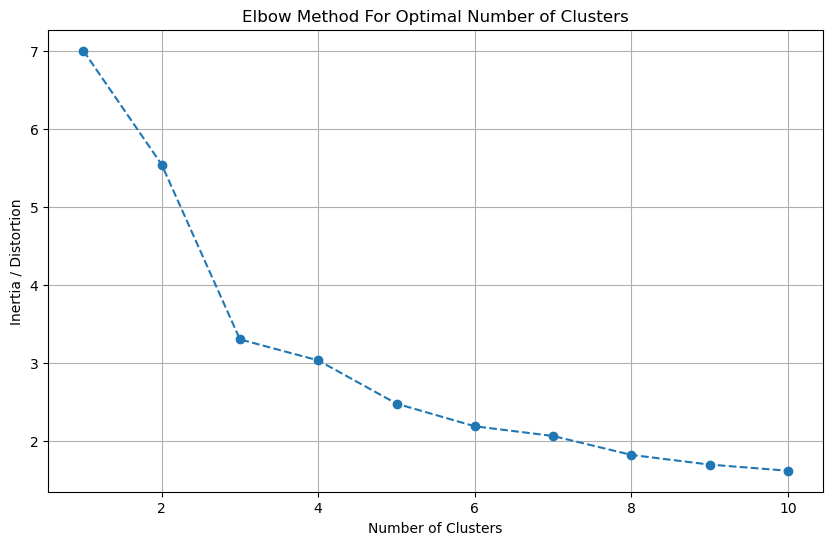

In [25]:
# plot distortion and inertia for kmeans, you can either plot them seperately or use fig, ax = plt.subplots(1, 2) to plot them in the same figure. Suggest the optimal number of clusters based on the plot.


plt.figure(figsize=(10,6))
plt.plot(df_inertia_distortion['Number of Clusters'], df_inertia_distortion['Inertia'], marker='o', linestyle='--')
plt.figure(figsize=(10,6))
plt.plot(df_inertia_distortion['Number of Clusters'], df_inertia_distortion['Distortion'], marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia / Distortion')
plt.grid(True)
plt.show()

# Perform DBSCAN and predict the labels

Highest Silhouette score: 0.338171
Corresponding number of clusters: 35


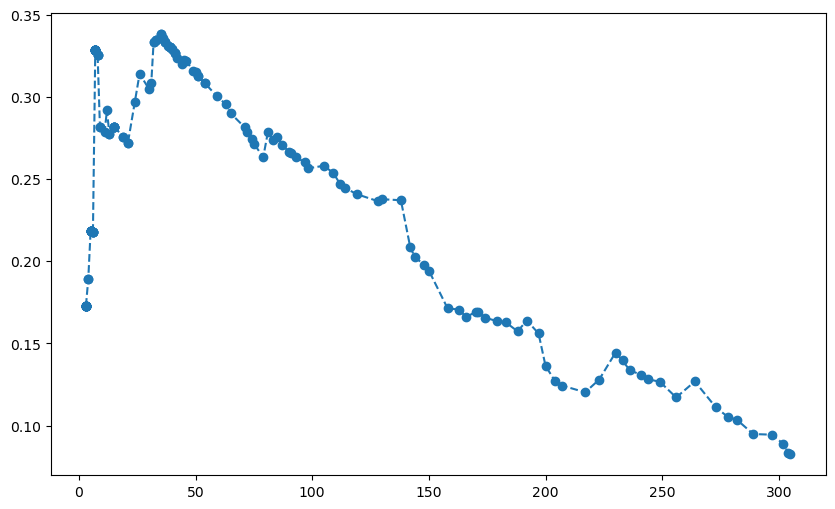

In [26]:
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.
from sklearn import metrics

eps_range = np.arange(0.01,2,0.01)
min_samples_range = range(1,5)
n_clusters = []
silhouette_scores = []
for eps in eps_range:
    silhouette_score = []
    n_cluster = []
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_normalized)
        try:
            silhouette_score.append(metrics.silhouette_score(X_normalized, dbscan.labels_))
            n_cluster.append(len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0))
        except ValueError:
            silhouette_score.append(np.nan)
            n_cluster.append(np.nan)

    silhouette_scores.append(np.max(silhouette_score))
    n_clusters.append(np.max(n_cluster))



df_dbscan = pd.DataFrame({'Number of Clusters': n_clusters, 'Silhouette': silhouette_scores}).sort_values(by='Number of Clusters')
plt.figure(figsize=(10,6))
plt.plot(df_dbscan['Number of Clusters'], df_dbscan['Silhouette'], marker='o', linestyle='--')

print("Highest Silhouette score: %f" % np.mean(df_dbscan[df_dbscan['Silhouette'] == np.max(df_dbscan['Silhouette'])]['Silhouette']))
print("Corresponding number of clusters: %d" % round(np.mean(df_dbscan[df_dbscan['Silhouette'] == np.max(df_dbscan['Silhouette'])]['Number of Clusters'])))

# Agglomerative Clustering (Hierarchical clustering)

In [120]:
# Perform Agglomerative Clustering

clusters_range = range(1, 11)
for n_clusters in clusters_range:
    Agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    Agglomerative.fit(X_normalized) 


 ### Plot the clusters for Agglomerative Clustering

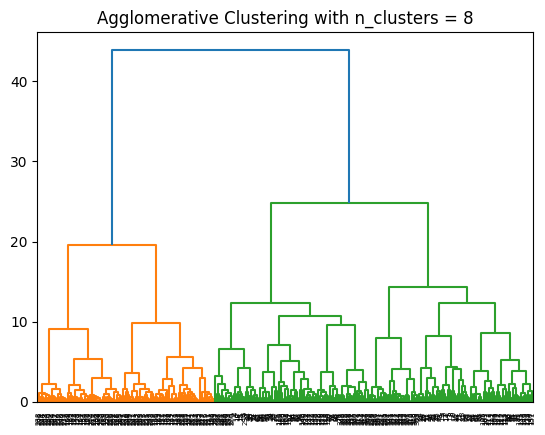

In [124]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# clusters_range = range(1, 11)
# for n_clusters in clusters_range:
Agglomerative = AgglomerativeClustering(distance_threshold=10,n_clusters=None)
Agglomerative = Agglomerative.fit(X_normalized)
plt.title('Agglomerative Clustering with n_clusters = %d' % Agglomerative.n_clusters_)
plot_dendrogram(Agglomerative)
plt.show()

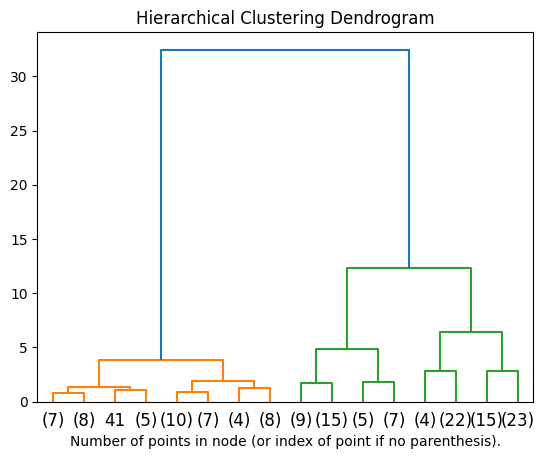

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    distances =  np.arange(model.children_.shape[0])

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# Mean Shift

In [ ]:
# Perform MeanShift Clustering and predict number 

 ### Plot the clusters for Mean Shift Clustering

# Birch

In [ ]:
# perform birc clustering and predict number of clusters